In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Prediction using voltage, current, and temperature

In [3]:
real = pd.read_csv("../DATA/DataFrame/B0005_capacity_df.csv")
MC_LSTM = pd.read_csv("./MC_LSTM.csv")
MC_AttentionLSTM = pd.read_csv("./MC_AttentionLSTM.csv")
MC_1MAttn = pd.read_csv("./MC_1MAttn.csv")
MC_PE_1MAttn = pd.read_csv("./MC_PE_1MAttn.csv")
MC_2MAttn = pd.read_csv("./MC_2MAttn.csv")
MC_PE_2MAttn = pd.read_csv("./MC_PE_2MAttn.csv")

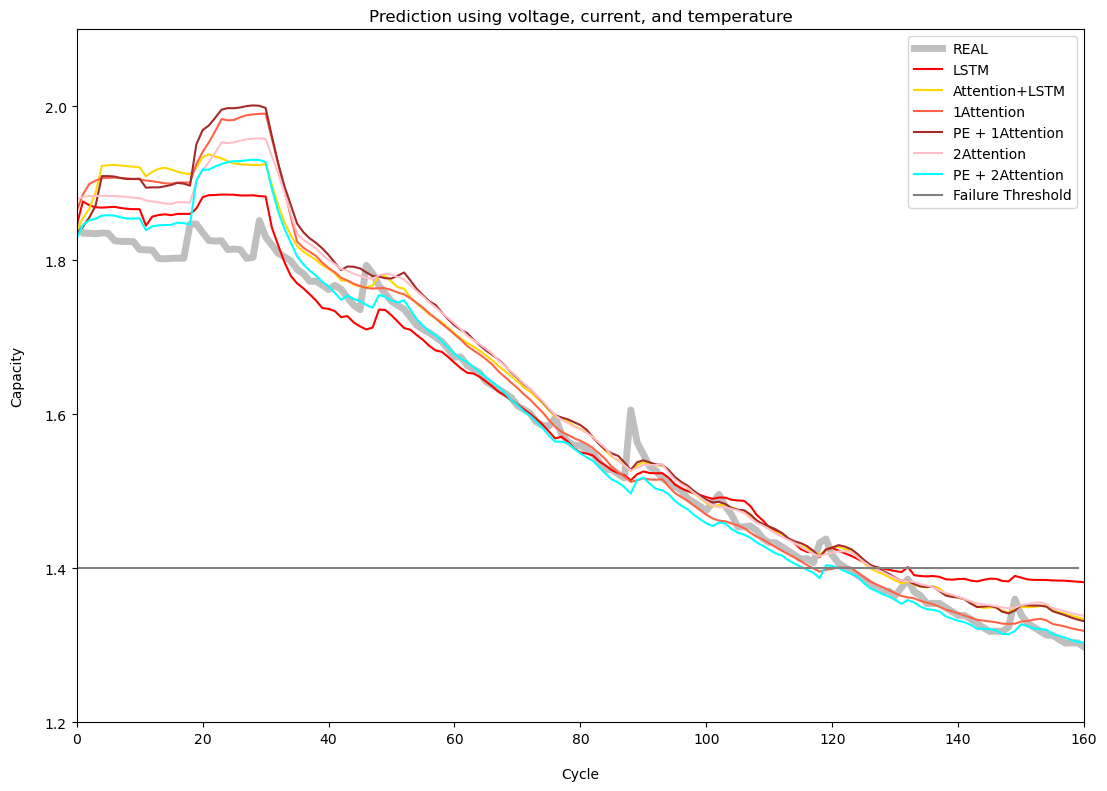

In [4]:
plt.rcParams['figure.figsize'] = [13, 9]
plt.plot(range(len(real.index)), real["capacity"], label="REAL", color="gray", linewidth=5, alpha=0.5)
plt.plot(range(len(real.index)), MC_LSTM.iloc[:,0], label="LSTM", color = 'red')
plt.plot(range(len(real.index)), MC_AttentionLSTM.iloc[:,0], label="Attention+LSTM", color = 'gold')
plt.plot(range(len(real.index)), MC_1MAttn.iloc[:,0], label="1Attention", color = 'tomato')
plt.plot(range(len(real.index)), MC_PE_1MAttn.iloc[:,0], label="PE + 1Attention", color = 'brown')
plt.plot(range(len(real.index)), MC_2MAttn.iloc[:,0], label="2Attention", color = 'pink')
plt.plot(range(len(real.index)), MC_PE_2MAttn.iloc[:,0], label="PE + 2Attention", color = 'cyan')

plt.plot(range(160), [1.4 for i in range(160)], label='Failure Threshold', color='gray')

plt.xlim([0, 160])
plt.ylim([1.2, 2.1])
plt.title("Prediction using voltage, current, and temperature")
plt.xlabel(xlabel='Cycle', labelpad=15)
plt.ylabel(ylabel='Capacity', labelpad=15)
plt.legend()
plt.show()

# RNN 계열 VS Attention 계열(NO RNN)

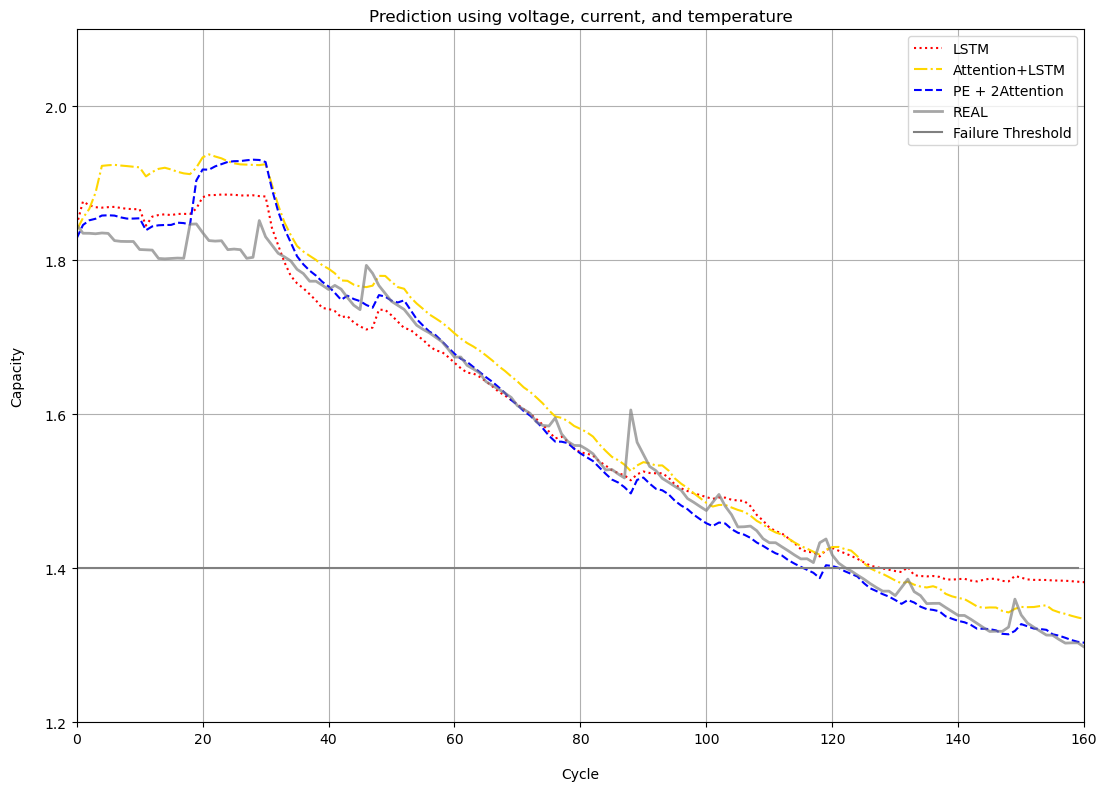

In [5]:
plt.plot(range(len(real.index)), MC_LSTM.iloc[:,0], label="LSTM", color = 'red', linestyle=':')
plt.plot(range(len(real.index)), MC_AttentionLSTM.iloc[:,0], label="Attention+LSTM", color = 'gold', linestyle='-.')
#plt.plot(range(len(real.index)), MC_1MAttn.iloc[:,0], label="1Attention", color = 'tomato')
#plt.plot(range(len(real.index)), MC_PE_1MAttn.iloc[:,0], label="PE + 1Attention", color = 'brown')
#plt.plot(range(len(real.index)), MC_2MAttn.iloc[:,0], label="2Attention", color = 'pink')
plt.plot(range(len(real.index)), MC_PE_2MAttn.iloc[:,0], label="PE + 2Attention", color = 'blue', linestyle='--')

plt.plot(range(len(real.index)), real["capacity"], label="REAL", color="gray", linewidth=2, alpha=0.7)
plt.plot(range(160), [1.4 for i in range(160)], label='Failure Threshold', color='gray')

plt.xlim([0, 160])
plt.ylim([1.2, 2.0])
plt.title("Prediction using voltage, current, and temperature")
plt.xlabel(xlabel='Cycle', labelpad=15)
plt.ylabel(ylabel='Capacity', labelpad=15)
plt.legend()
plt.grid('True')
plt.show()

### B0005 RMSE  MAPE  사용 파라미터 수 비교

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

compare_view = pd.DataFrame(columns=['Name','MAPE(%)','파라미터 수'])

all_models_predicts = [MC_LSTM, MC_AttentionLSTM, MC_PE_2MAttn,MC_2MAttn]
model_names = ['LSTM(Ref)', 'Attention+LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)', '2*Multi_Head_Attn']
model_params = [7471, 11197,5167, 5167]

for name, params, model in zip(model_names, model_params,all_models_predicts): 
    # RMSE = np.round(mean_squared_error(real.values.reshape(-1), model.values.reshape(-1)) ** 0.5, 5)
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1), model.values.reshape(-1)) * 100, 3)
    # SMAPE = np.round(smape(real.values.reshape(-1), model.values.reshape(-1)), 3)
    
    row = pd.DataFrame([[name, MAPE, params]], columns=['Name', 'MAPE(%)', '파라미터 수'])

    compare_view = pd.concat([compare_view, row], axis=0)


In [7]:
# EoL(cycle) 예측

EoL_diff_list = []

real_EoL_cycle = 0
for cap in real.values.reshape(-1):
    real_EoL_cycle += 1
    if cap <= 1.4:
        break

for model in all_models_predicts:
    EoL_cycle = 0
    for cap in model.values.reshape(-1):
        EoL_cycle += 1

        if cap <= 1.4:
            break
    print(EoL_cycle)
    EoL_diff_list.append(EoL_cycle - real_EoL_cycle)

EoL_diff_Series = pd.Series(EoL_diff_list,name="EoL Cycle from baseline(real = 124)", dtype=int)
EoL_diff_Series

130
128
117
128


0    6
1    4
2   -7
3    4
Name: EoL Cycle from baseline(real = 124), dtype: int64

In [8]:
compare_view['EoL Cycle diff(real = 124)'] = EoL_diff_list
compare_view.set_index("Name")

,MAPE(%),파라미터 수,EoL Cycle diff(real = 124)
Name,,,
LSTM(Ref),2.056,7471,6
Attention+LSTM(Ref),2.183,11197,4
PE_2*Multi_Head_Attn(제안),1.252,5167,-7
2*Multi_Head_Attn,2.291,5167,4


### B0006 RMSE  MAPE  사용 파라미터 수 비교

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0006_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_LSTM.csv")
MC_AttentionLSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_AttentionLSTM.csv")
MC_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_1MAttn.csv")
MC_PE_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_PE_1MAttn.csv")
MC_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_2MAttn.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_PE_2MAttn.csv")

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

compare_view = pd.DataFrame(columns=['Name','MAPE(%)','파라미터 수'])

all_models_predicts = [MC_LSTM, MC_AttentionLSTM, MC_PE_2MAttn,MC_2MAttn]
model_names = ['LSTM(Ref)', 'Attention+LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)', '2*Multi_Head_Attn']
model_params = [7471, 11197,5167, 5167]

for name, params, model in zip(model_names, model_params,all_models_predicts): 
    # RMSE = np.round(mean_squared_error(real.values.reshape(-1), model.values.reshape(-1)) ** 0.5, 5)
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1), model.values.reshape(-1)) * 100, 3)
    # SMAPE = np.round(smape(real.values.reshape(-1), model.values.reshape(-1)), 3)
    
    row = pd.DataFrame([[name, MAPE, params]], columns=['Name', 'MAPE(%)', '파라미터 수'])

    compare_view = pd.concat([compare_view, row], axis=0)



# EoL(cycle) 예측
EoL_diff_list = []

real_EoL_cycle = 0
for cap in real.values.reshape(-1):
    real_EoL_cycle += 1
    if cap <= 1.4:
        break

for model in all_models_predicts:
    EoL_cycle = 0
    for cap in model.values.reshape(-1):
        EoL_cycle += 1

        if cap <= 1.4:
            break
    print(EoL_cycle)
    EoL_diff_list.append(EoL_cycle - real_EoL_cycle)

EoL_diff_Series = pd.Series(EoL_diff_list,name="EoL Cycle from baseline(real = 108)", dtype=int)
EoL_diff_Series


110
140
106
111


0     2
1    32
2    -2
3     3
Name: EoL Cycle from baseline(real = 108), dtype: int64

In [10]:
compare_view['EoL Cycle diff(real = 108)'] = EoL_diff_list
compare_view.set_index("Name")

,MAPE(%),파라미터 수,EoL Cycle diff(real = 108)
Name,,,
LSTM(Ref),4.024,7471,2
Attention+LSTM(Ref),4.683,11197,32
PE_2*Multi_Head_Attn(제안),2.831,5167,-2
2*Multi_Head_Attn,3.595,5167,3


### B0007 RMSE  MAPE  사용 파라미터 수 비교

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0007_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_LSTM.csv")
MC_AttentionLSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_AttentionLSTM.csv")
MC_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_1MAttn.csv")
MC_PE_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_PE_1MAttn.csv")
MC_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_2MAttn.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_PE_2MAttn.csv")

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

compare_view = pd.DataFrame(columns=['Name','MAPE(%)','파라미터 수'])

all_models_predicts = [MC_LSTM, MC_AttentionLSTM, MC_PE_2MAttn,MC_2MAttn]
model_names = ['LSTM(Ref)', 'Attention+LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)', '2*Multi_Head_Attn']
model_params = [7471, 11197,5167, 5167]

for name, params, model in zip(model_names, model_params,all_models_predicts): 
    # RMSE = np.round(mean_squared_error(real.values.reshape(-1), model.values.reshape(-1)) ** 0.5, 5)
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1), model.values.reshape(-1)) * 100, 3)
    # SMAPE = np.round(smape(real.values.reshape(-1), model.values.reshape(-1)), 3)
    
    row = pd.DataFrame([[name, MAPE, params]], columns=['Name', 'MAPE(%)', '파라미터 수'])

    compare_view = pd.concat([compare_view, row], axis=0)



# EoL(cycle) 예측
EoL_diff_list = []

real_EoL_cycle = 0
for cap in real.values.reshape(-1):
    real_EoL_cycle += 1
    if cap <= 1.4:
        break

for model in all_models_predicts:
    EoL_cycle = 0
    for cap in model.values.reshape(-1):
        EoL_cycle += 1

        if cap <= 1.4:
            break
    print(EoL_cycle)
    EoL_diff_list.append(EoL_cycle - real_EoL_cycle)

EoL_diff_Series = pd.Series(EoL_diff_list,name="EoL Cycle from baseline(real = None)", dtype=int)
EoL_diff_Series


167
167
167
167


0    0
1    0
2    0
3    0
Name: EoL Cycle from baseline(real = None), dtype: int64

In [12]:
compare_view['EoL Cycle diff(real = None)'] = EoL_diff_list
compare_view.set_index("Name")

,MAPE(%),파라미터 수,EoL Cycle diff(real = None)
Name,,,
LSTM(Ref),1.403,7471,0
Attention+LSTM(Ref),4.298,11197,0
PE_2*Multi_Head_Attn(제안),1.405,5167,0
2*Multi_Head_Attn,2.459,5167,0


### B0018 RMSE  MAPE  사용 파라미터 수 비교

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0018_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_LSTM.csv")
MC_AttentionLSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_AttentionLSTM.csv")
MC_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_1MAttn.csv")
MC_PE_1MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_PE_1MAttn.csv")
MC_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_2MAttn.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_PE_2MAttn.csv")

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

compare_view = pd.DataFrame(columns=['Name','MAPE(%)','파라미터 수'])

all_models_predicts = [MC_LSTM, MC_AttentionLSTM, MC_PE_2MAttn,MC_2MAttn]
model_names = ['LSTM(Ref)', 'Attention+LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)', '2*Multi_Head_Attn']
model_params = [7471, 11197,5167, 5167]

for name, params, model in zip(model_names, model_params,all_models_predicts): 
    # RMSE = np.round(mean_squared_error(real.values.reshape(-1), model.values.reshape(-1)) ** 0.5, 5)
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1), model.values.reshape(-1)) * 100, 3)
    # SMAPE = np.round(smape(real.values.reshape(-1), model.values.reshape(-1)), 3)
    
    row = pd.DataFrame([[name, MAPE, params]], columns=['Name', 'MAPE(%)', '파라미터 수'])

    compare_view = pd.concat([compare_view, row], axis=0)



# EoL(cycle) 예측
EoL_diff_list = []

real_EoL_cycle = 0
for cap in real.values.reshape(-1):
    real_EoL_cycle += 1
    if cap <= 1.4:
        break

for model in all_models_predicts:
    EoL_cycle = 0
    for cap in model.values.reshape(-1):
        EoL_cycle += 1

        if cap <= 1.4:
            break
    print(EoL_cycle)
    EoL_diff_list.append(EoL_cycle - real_EoL_cycle)

EoL_diff_Series = pd.Series(EoL_diff_list,name="EoL Cycle from baseline(real = 124)", dtype=int)
EoL_diff_Series


81
96
98
131


0   -15
1     0
2     2
3    35
Name: EoL Cycle from baseline(real = 124), dtype: int64

In [14]:
compare_view['EoL Cycle diff(real = 124)'] = EoL_diff_list
compare_view.set_index("Name")

,MAPE(%),파라미터 수,EoL Cycle diff(real = 124)
Name,,,
LSTM(Ref),1.629,7471,-15
Attention+LSTM(Ref),1.170,11197,0
PE_2*Multi_Head_Attn(제안),1.822,5167,2
2*Multi_Head_Attn,4.137,5167,35


## LSTM vs 제안 모델 구간별 비교

### B0005

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0005_capacity_df.csv")
MC_LSTM = pd.read_csv("./MC_LSTM.csv")
MC_PE_2MAttn = pd.read_csv("./MC_PE_2MAttn.csv")

compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[:40], model.values.reshape(-1)[:40]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)

print("Before 40 Cycle")
display(compare_view.set_index("Name"))

Before 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),2.270
PE_2*Multi_Head_Attn(제안),2.745


In [16]:
compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[40:], model.values.reshape(-1)[40:]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)
print("after 40 Cycle")
display(compare_view.set_index("Name"))

after 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),1.988
PE_2*Multi_Head_Attn(제안),0.783


### B0006

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0006_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_LSTM.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0006/MC_PE_2MAttn.csv")

compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[:40], model.values.reshape(-1)[:40]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)

print("Before 40 Cycle")
display(compare_view.set_index("Name"))

Before 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),3.084
PE_2*Multi_Head_Attn(제안),4.469


In [18]:
compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[40:], model.values.reshape(-1)[40:]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)
print("after 40 Cycle")
display(compare_view.set_index("Name"))

after 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),4.320
PE_2*Multi_Head_Attn(제안),2.316


### B0007

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0007_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_LSTM.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0007/MC_PE_2MAttn.csv")

compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[:40], model.values.reshape(-1)[:40]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)

print("Before 40 Cycle")
display(compare_view.set_index("Name"))

Before 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),1.311
PE_2*Multi_Head_Attn(제안),2.438


In [20]:
compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[40:], model.values.reshape(-1)[40:]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)
print("after 40 Cycle")
display(compare_view.set_index("Name"))

after 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),1.432
PE_2*Multi_Head_Attn(제안),1.079


### B0018

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

real = pd.read_csv("../DATA/DataFrame/B0018_capacity_df.csv")
MC_LSTM = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_LSTM.csv")
MC_PE_2MAttn = pd.read_csv("../Train_Other_MCModels/PREDICT_B0018/MC_PE_2MAttn.csv")

compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[:40], model.values.reshape(-1)[:40]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)

print("Before 40 Cycle")
display(compare_view.set_index("Name"))

Before 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),0.955
PE_2*Multi_Head_Attn(제안),1.212


In [22]:
compare_view = pd.DataFrame(columns=['Name','MAPE(%)'])
all_models_predicts = [MC_LSTM, MC_PE_2MAttn]
model_names = ['LSTM(Ref)', 'PE_2*Multi_Head_Attn(제안)']

for name, model in zip(model_names, all_models_predicts): 
    MAPE = np.round(mean_absolute_percentage_error(real.values.reshape(-1)[40:], model.values.reshape(-1)[40:]) * 100, 3)
    row = pd.DataFrame([[name, MAPE]], columns=['Name', 'MAPE(%)'])
    compare_view = pd.concat([compare_view, row], axis=0)
print("after 40 Cycle")
display(compare_view.set_index("Name"))

after 40 Cycle


,MAPE(%)
Name,
LSTM(Ref),1.925
PE_2*Multi_Head_Attn(제안),2.091
